In [5]:
from DataFormatter import DataFormatter as dFormatter
import MathematicalFunctions
import VideoProducer
import subprocess

import matplotlib.pyplot as plt
import math
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

DATA = "flat_GoldDaten.csv"
ROOT_PLOT_PATH = "Grafiken/"

# Get DF Formatted
formatter = dFormatter(DATA)
formatter.setFormattedDataFrame()
formattedData = formatter.getFormattedDataFrame()
print ("An initial analysis of the goldPrices")
formattedData.head()

DataFormatter: Data registered
An initial analysis of the goldPrices


,Price
Date,
1833-01-01,18.93
1833-02-01,18.93
1833-03-01,18.93
1833-04-01,18.93
1833-05-01,18.93


In [6]:
# Separete data
trainingSet = formatter.getDataBetweenDates(formattedData, "2015-1-1", "2019-12-31")
testSet = formatter.getDataBetweenDates(formattedData, "2020-1-1", "2024-12-31")
"""
plt.plot(trainDaten.index, trainDaten["revenue"], color = "black")
plt.plot(testDaten.index, testDaten["revenue"], color = "red")
plt.ylabel('Euros')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()
"""

'\nplt.plot(trainDaten.index, trainDaten["revenue"], color = "black")\nplt.plot(testDaten.index, testDaten["revenue"], color = "red")\nplt.ylabel(\'Euros\')\nplt.xlabel(\'Date\')\nplt.xticks(rotation=45)\nplt.title("Train/Test split")\nplt.show()\n'

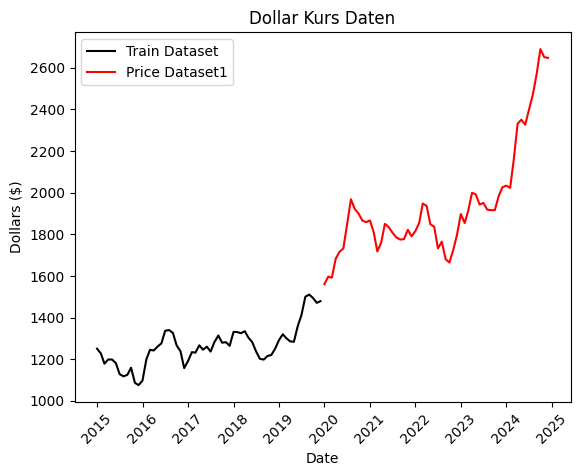

In [7]:
maxGoldValue = int( math.ceil( MathematicalFunctions.getMaxPrice( trainingSet["Price"].max(), testSet["Price"].max() ) ) )
y = range(maxGoldValue)
plt.plot(trainingSet.index, trainingSet["Price"], color = "black", label = "Train Dataset")
plt.plot(testSet.index, testSet["Price"], color = "red", label = "Price Dataset" + str(1))
plt.ylabel('Dollars (\u0024)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Dollar Kurs Daten")
plt.legend()
plt.show()

In [ ]:
# Start to train the model: SARIMAX (extension of ARMA to seasonal and trends events. Gold preices)
y = trainingSet["Price"]
#y.index = pd.DatetimeIndex(y.index).to_period('D')  # Warum brauchen wir das eigentlich?
#SARIMAXModel = SARIMAX(y, order = (1, 3, 3))
#SARIMAXModel = SARIMAX(y, order = (1, 1, 1), seasonal_order=(2, 2, 2, 12))

#mse = mean_squared_error(testSet["Price"], forecastDF)
#print ("mittlere quadratische Abweichung: ", mse)

NUMBER_OF_IMAGES_PRODUCED = 20
for i in range(2, NUMBER_OF_IMAGES_PRODUCED):
    if (i % 2 == 0 ):
        continue
    print("Predicting best values: ", i)
    #SARIMAXModel = SARIMAX(y, order = (1, 1, 5), seasonal_order=(1, 2, 3, 12))
    '''
    Fitted Params:
    seasonal_params (4, 2, 9)
    '''
    SARIMAXModel = SARIMAX(y, order = (1, 1, 5), seasonal_order=(4, 2, 9, i))
    SARIMAXModel = SARIMAXModel.fit()

    yForecast = SARIMAXModel.get_forecast( len(testSet.index) )
    forecastDF = yForecast.conf_int(alpha = 0.05) 

    forecastDF["Predictions"] = SARIMAXModel.predict(start = forecastDF.index[0], end = forecastDF.index[-1])
    forecastDF.index = testSet.index
    forecastDF = forecastDF["Predictions"]

    plt.ylabel('Dollars (\u0024)')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.title("Dollar Kurs Daten")
    plt.ylim(900, 3500)
    plt.plot(trainingSet.index, trainingSet["Price"], color = "black", label = "Train Dataset")
    plt.plot(testSet.index, testSet["Price"], color = "red", label = "Test Dataset")
    plt.plot(forecastDF, color='green', label = 'Predictions: ' + '(' + str(i) + ', 2, 3, 12)')
    plt.legend(loc='upper left')
    plt.savefig(ROOT_PLOT_PATH + "GoldKurs" + str(i) + ".png")
    plt.clf()

#plt.show()

Predicting best values:  2


ValueError: Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.

In [ ]:
# Produce a small animation of the dollar course
VideoProducer.generateVideo(ROOT_PLOT_PATH, 'SeasonalVierterParameter')
print("All Done!!!!")

All Done!!!!


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e